In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the data

In [2]:
data=pd.read_csv('Week8_Q&A_data.csv')

In [3]:
#setting the max_row display option
pd.options.display.max_rows = 1000

In [4]:
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


### 1. Carry out descriptive analytics on the dataset

In [5]:
# No: of rows and columns of the dataset
data.shape

(28, 3)

In [6]:
# checking for null values
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [8]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [9]:
# Gender with respect to Test preparation
data.groupby(['Gender', 'Test preparation']).size()

Gender  Test preparation
female  completed            4
        none                12
male    completed            3
        none                 9
dtype: int64

### 2. Check whether female and male students score the same marks.

In [10]:
#Total marks based on gender and test preparation
data[['Gender','Test preparation','Total Marks']].groupby(['Gender','Test preparation']).agg(['mean','count']).round(1)

Total Marks      
                               mean count
Gender Test preparation                  
female completed               45.2     4
       none                    29.9    12
male   completed               43.7     3
       none                    26.0     9

In [11]:
data.groupby("Gender")["Total Marks"].mean()

Gender
female    33.750000
male      30.416667
Name: Total Marks, dtype: float64

In [20]:
from scipy import stats
male_marks = data[data['Gender'] == 'male']['Total Marks']
female_marks = data[data['Gender'] == 'female']['Total Marks']
ttest,pval=stats.ttest_ind(female_marks, male_marks)   
print(ttest,pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.6940885268848668 0.4937822317960763
accept null hypothesis


Since pval>0.05 It accepts null hypothesis i.e,Male & female students has scored the same marks

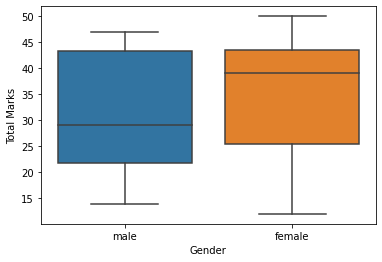

In [13]:
sns.boxplot(x='Gender',y='Total Marks',data=data)
plt.show()

### 3.Whether test preparation helps the students?

H0: Test preparation has no effect on students performance

H1: Test preparation helps the students in improving the performance

In [14]:
data.groupby("Test preparation")["Total Marks"].mean()

Test preparation
completed    44.571429
none         28.238095
Name: Total Marks, dtype: float64

In [15]:
a=data[data['Test preparation']=='none']['Total Marks']
b=data[data['Test preparation']=='completed']['Total Marks']

In [23]:
t_value,p_value=stats.ttest_ind(b,a,alternative='greater')
print(t_value,p_value)
if p_value<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.6143637527769217 0.0006335646228660053
reject null hypothesis


#### i.e, Test preparation helps the students in improving the performance

#### SUBMITTED BY:GROUP-8